<a href="https://colab.research.google.com/github/Ayubbett/Moringa-School-week6-IP/blob/main/Moringa_Data_Science_Core_W6_Independent_Project_2021_11_AYUB_BETT_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTING GAME RESULTS BETWEEN TWO TEAMS**

# Assessment Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

# 1. Defining the Question

# a) Specifying the Question

Predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly

# b) Defining the Metric for Success

This project aims at creating a suitable model either using polynomial regression or logistic regression that predicts the number of goal a team playing in a tournament scores.

# c) Understanding the context

The datasets available for the project are match details and team rankings by football governing body FIFA. Match details include details such as teams playing at specific venues plus the scores of the game. It also includes tournament type for example friendly or world cup together with whether the venue was neutral or not.

The FIFA rankings data comtains information like the teams ranking as in the position they are in compared to the rest of the world countries. It also has information such as confederation name as well as the ranking date.

# d) Recording the Experimental Design

Expected flow for the project includes the following:



*   Perform Exploratory Data Analysis (EDA)
*   Perform any necessary feature engineering.

*   Check for multicollinearity.
*   Start building the model.

*   Model cross validation.
*   Compute model accuracy and RMSE.

*   Create residual plots for your models, and assess their 
*   heteroscedasticity using Bartlett’s test




















# Data relevance / Appropriateness of Data

**Importing Libraries**

In [1]:
#Importing libraries we will use for data manipulation and visualization
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Data**

In [2]:
results_df = pd.read_csv("results.csv")
fifa_df = pd.read_csv("fifa_ranking.csv")

**Data Exploration**

In [3]:
#Checking the top of the results dataset
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
#Checking the bottom of the results dataset
results_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [5]:
#Checking the top of the ranking dataset
fifa_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [6]:
#Checking the bottom of the ranking dataset
fifa_df.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [7]:
#Checking the number of columns and rows
re = results_df.shape
ra = fifa_df.shape

#printing them out
print(re,ra)

(40839, 9) (57793, 16)


The results dataset has 40839 rows and 9 columns while the fifa ranking dataset has 57793 rows and 16 columns.

In [8]:
#Checking for duplicates in the datasets
results_df.duplicated().sum()

#We notice there are no duplicates 

0

In [9]:
fifa_df.duplicated().sum()
#There are 37 duplicated records 

37

In [10]:
fifa_df.drop_duplicates(inplace=True)

In [11]:
fifa_df.duplicated().sum()

0

In [12]:
#Dropping unnecessary columns
results_df.drop(['city', 'country'], axis=1, inplace=True)
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,False
1,1873-03-08,England,Scotland,4,2,Friendly,False
2,1874-03-07,Scotland,England,2,1,Friendly,False
3,1875-03-06,England,Scotland,2,2,Friendly,False
4,1876-03-04,Scotland,England,3,0,Friendly,False


In [13]:
#Dropping unneccessary columns from the FIFA rankings dataset
fifa_df.drop(['total_points', 'previous_points', 'rank_change', 'cur_year_avg',
              'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
              'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
              'three_year_ago_weighted', 'country_abrv', 'confederation'], axis=1, inplace=True)
fifa_df.head()

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


Concerting date columns in the respective dataframes

In [14]:
results_df['date'] = pd.to_datetime(results_df['date'])
fifa_df['rank_date'] = pd.to_datetime(fifa_df['rank_date'])

Since FIFA rankings begun in 8th August 1993 in our dataset, we now get the games played on that date coming forward to 2018

In [15]:
# Filter data to get games played after 1993
res = results_df.loc[(results_df['date'] >= '1993-08-08T00:00:00.000000000')]
                  
# Display
res.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,False
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False


In [16]:
print(res.shape,fifa_df.shape)

(22924, 7) (57756, 3)


Merging the two datasets to create a rank for the games played

In [17]:
home_merged = res.merge(fifa_df, left_on=['home_team'], right_on=['country_full'], how='inner')
home_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,rank,country_full,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,59,Bolivia,1993-08-08
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,53,Bolivia,1993-09-23
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,53,Bolivia,1993-10-22
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,59,Bolivia,1993-11-19
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,58,Bolivia,1993-12-23


In [18]:
home_merged.shape

(5711363, 10)

Renaming the the created rank column to avoid ambiugity when we get the away team rank

In [19]:
home_merged.rename({'rank': 'home_rank'}, axis=1, inplace = True)
home_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_rank,country_full,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,59,Bolivia,1993-08-08
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,53,Bolivia,1993-09-23
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,53,Bolivia,1993-10-22
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,59,Bolivia,1993-11-19
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,58,Bolivia,1993-12-23


In [20]:
home_merged.duplicated().any()

True

In [21]:
home_merged.drop_duplicates(inplace=True)

In [22]:
home_merged.duplicated().any()

False

In [23]:
home_merged.shape

(5711252, 10)

In [24]:
away_merged = res.merge(fifa_df, left_on=['away_team'], right_on=['country_full'], how='inner')
away_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,rank,country_full,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,22,Uruguay,1993-08-08
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,15,Uruguay,1993-09-23
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,17,Uruguay,1993-10-22
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,18,Uruguay,1993-11-19
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,17,Uruguay,1993-12-23


In [25]:
away_merged.rename({'rank': 'away_rank'}, axis=1, inplace = True)
away_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,away_rank,country_full,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,22,Uruguay,1993-08-08
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,15,Uruguay,1993-09-23
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,17,Uruguay,1993-10-22
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,18,Uruguay,1993-11-19
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,17,Uruguay,1993-12-23


In [26]:
away_merged.duplicated().any()

True

In [27]:
away_merged.drop_duplicates(inplace=True)

In [28]:
away_merged.duplicated().any()

False

In [29]:
away_merged.shape

(5689305, 10)

In [30]:
away = away_merged["away_rank"]
home_merged = home_merged.join(away)
home_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_rank,country_full,rank_date,away_rank
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,59,Bolivia,1993-08-08,22.0
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,53,Bolivia,1993-09-23,15.0
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,53,Bolivia,1993-10-22,17.0
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,59,Bolivia,1993-11-19,18.0
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,58,Bolivia,1993-12-23,17.0


Dropping further unnecessary columns

In [31]:
home_merged.drop(['date', 'neutral', 'country_full','rank_date'], axis =1, inplace = True)

In [32]:
home_merged.shape

(5711252, 7)

In [33]:
home_merged.head()

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22.0
1,Bolivia,Uruguay,3,1,FIFA World Cup qualification,53,15.0
2,Bolivia,Uruguay,3,1,FIFA World Cup qualification,53,17.0
3,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,18.0
4,Bolivia,Uruguay,3,1,FIFA World Cup qualification,58,17.0


In [34]:
home_merged.duplicated().any()

True

In [35]:
home_merged.drop_duplicates(inplace=True)

In [36]:
home_merged.duplicated().any()

False

In [37]:
home_merged.isnull().any()

home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
home_rank     False
away_rank      True
dtype: bool

We notice we have null values in our dataset

In [38]:
final_df = home_merged.dropna()

In [39]:
final_df.isnull().any()

home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
home_rank     False
away_rank     False
dtype: bool

In [40]:
data = final_df.iloc[:40839]
data.shape

(40839, 7)

In [41]:
data.head()

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22.0
1,Bolivia,Uruguay,3,1,FIFA World Cup qualification,53,15.0
2,Bolivia,Uruguay,3,1,FIFA World Cup qualification,53,17.0
3,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,18.0
4,Bolivia,Uruguay,3,1,FIFA World Cup qualification,58,17.0


In [42]:
data.isnull().any()

home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
home_rank     False
away_rank     False
dtype: bool

In [43]:
data.duplicated().any()

False

Our final dataset has no null values and no duplicates too

# Checking outliers

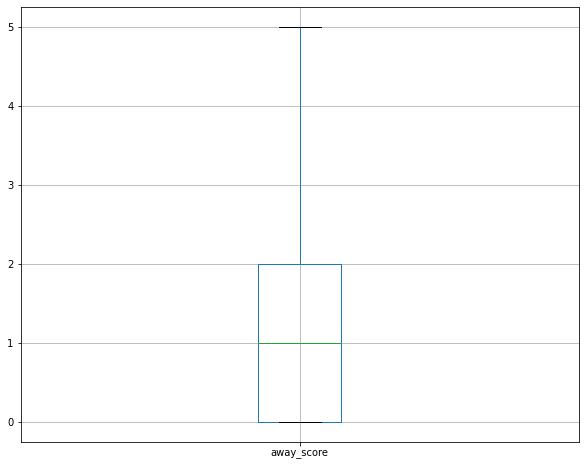

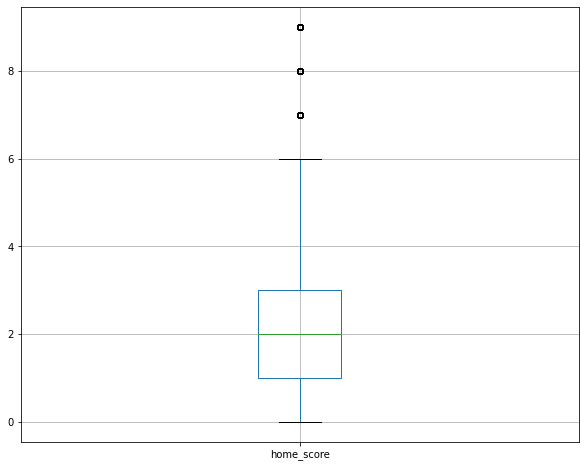

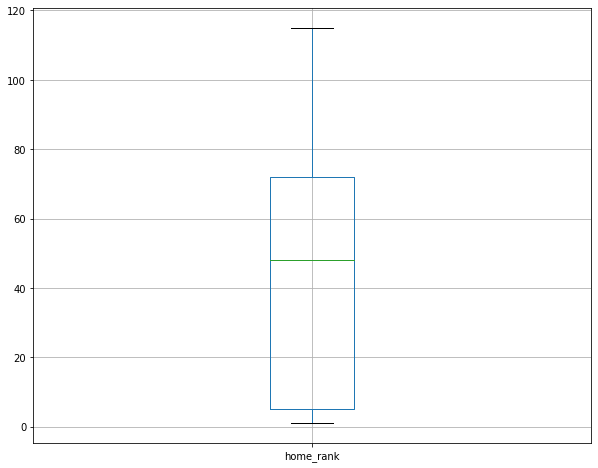

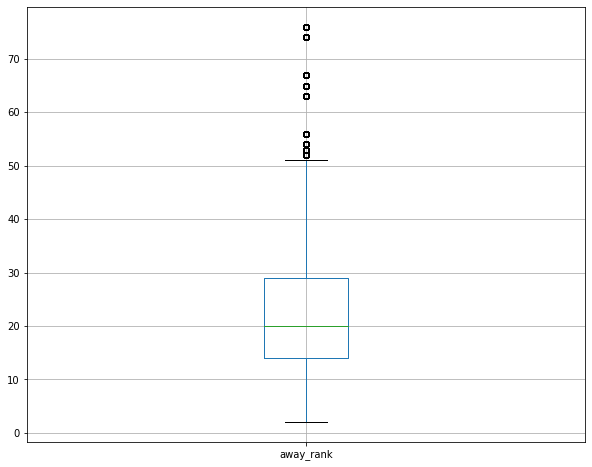

In [44]:
columns = ['away_score', 'home_score', 'home_rank', 'away_rank']
for col in columns:
  plt.figure(figsize = (10, 8))
  data.boxplot([col])

We notice there are some outliers but since they are as a result of some teams having high scores and the rankings of different countries we can work with them.

# **EXPLORATORY DATA ANALYSIS**

**UNIVARIATE ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


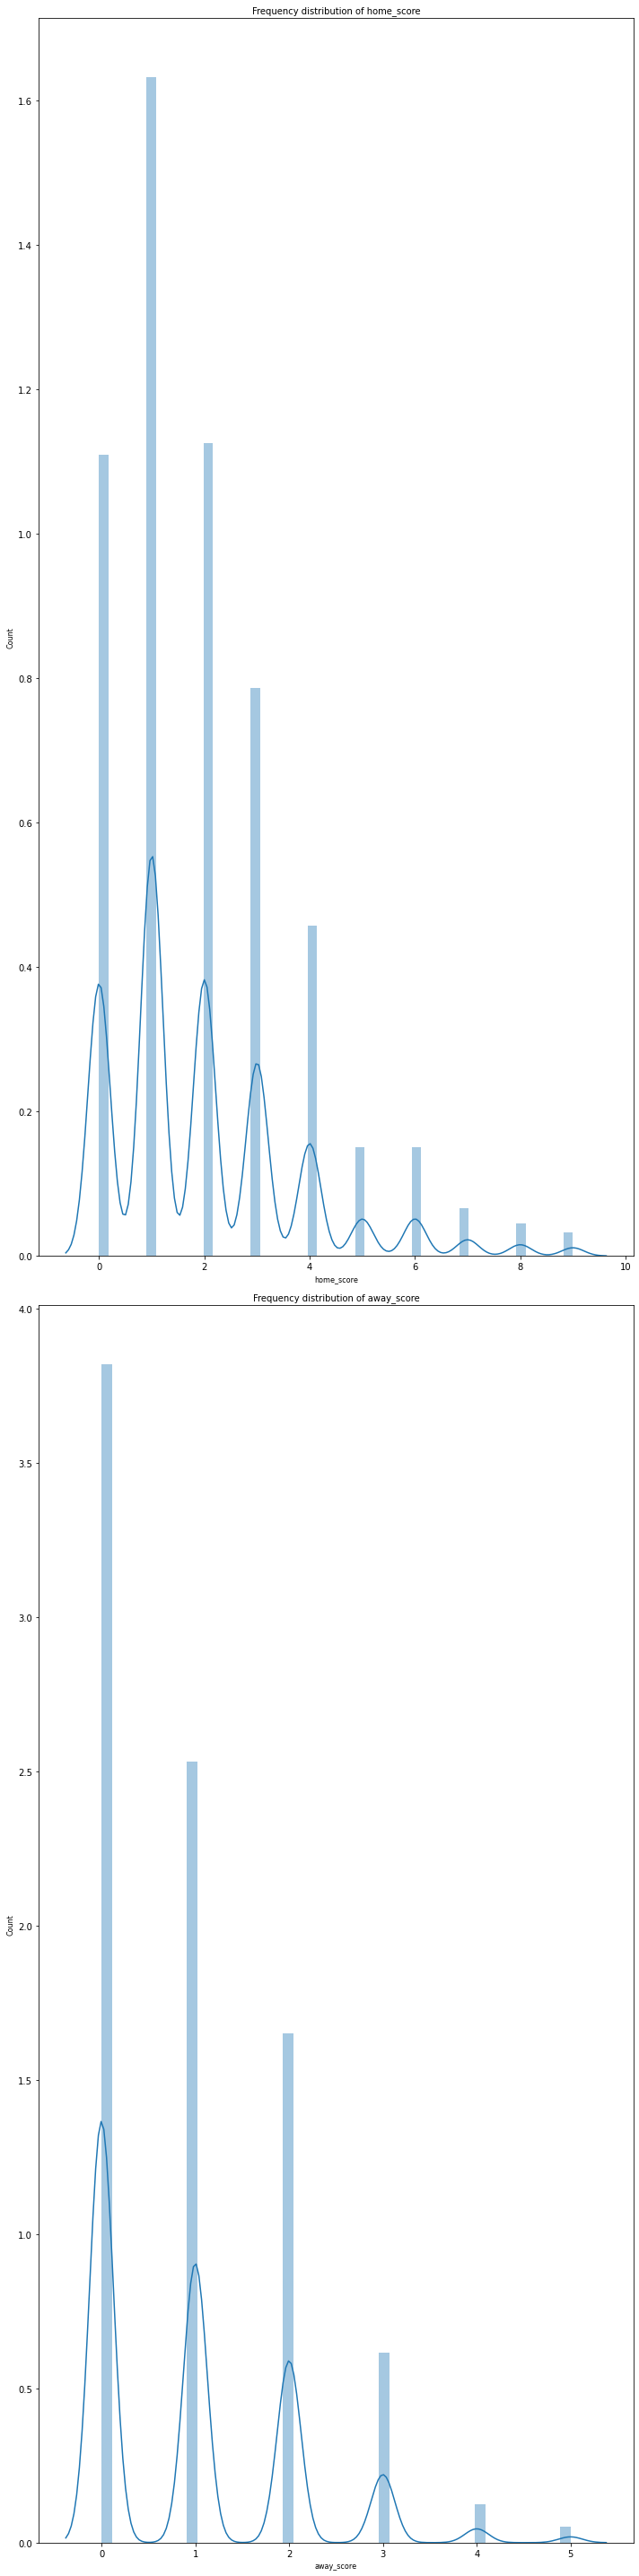

In [45]:
# Plotting distribution of numerical variables
num_cols = ['home_score', 'away_score']
fig, ax = plt.subplots(len(num_cols), figsize=(10,40))

for i, col_val in enumerate(num_cols):

    sns.distplot(data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

In [46]:
data['home_score'].mean()

#The mean number of goals scored at home is roughly 2

1.9524963882563235

In [47]:
data['away_score'].mean()

#The mean numner of goals scored by an away team is 1 

0.9599157667915473

In [48]:
data['home_team'].value_counts()

Bolivia    24300
Brazil     16539
Name: home_team, dtype: int64

**Bivariate Analysis**

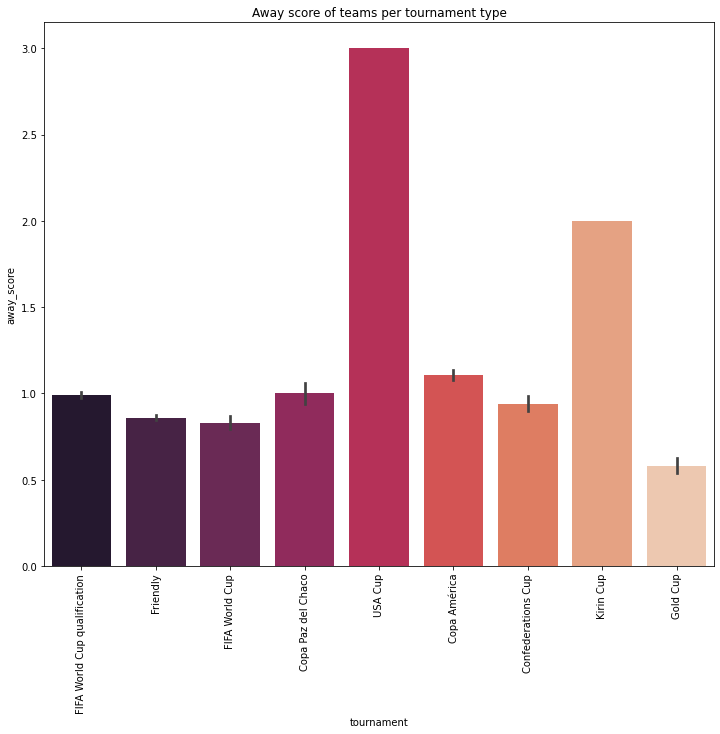

In [49]:
f, ax1 = plt.subplots(figsize=(12,10))

sns.barplot(x=data["tournament"], y=data["away_score"], palette='rocket', ax=ax1)

plt.xticks(rotation= 90)
plt.xlabel('tournament')
plt.ylabel('away_score')
plt.title('Away score of teams per tournament type')
plt.show()

From this we notice that USA cup games have led to the most number of away

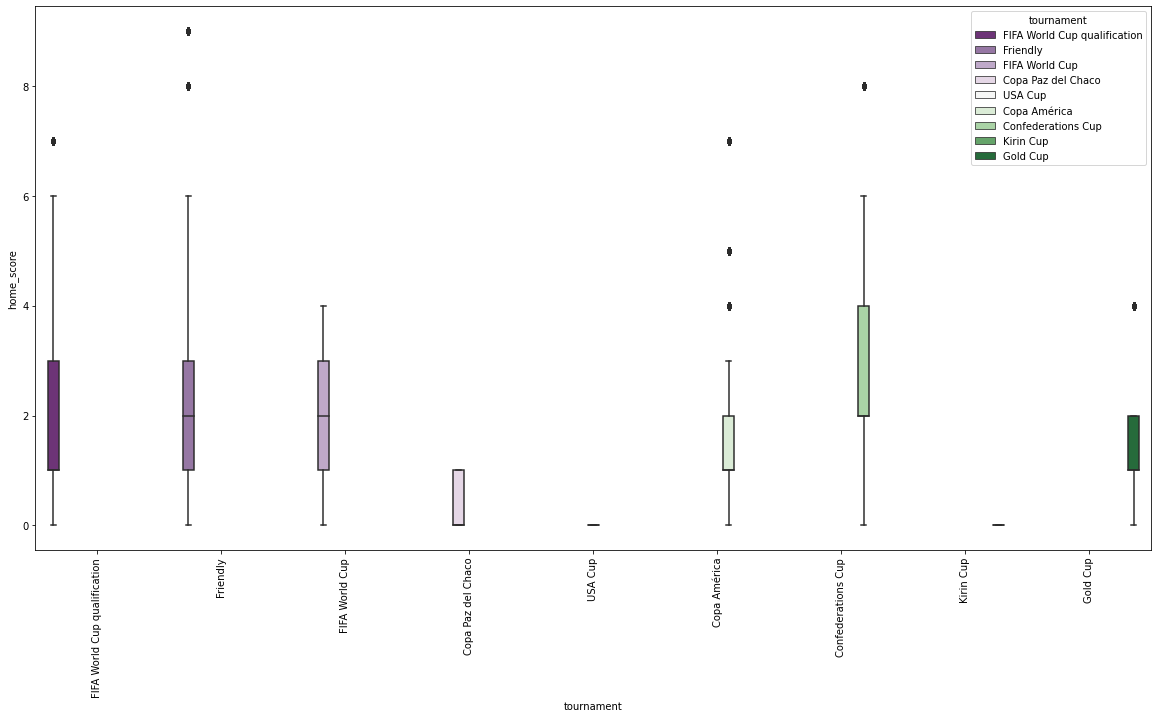

In [50]:
# Box plots of tournament type with their home team goals
# --
#

f,ax = plt.subplots(figsize =(20,10))
sns.boxplot(x="tournament" , y="home_score", hue="tournament",data=data,palette="PRGn",ax=ax)
plt.xticks(rotation= 90)
plt.show()

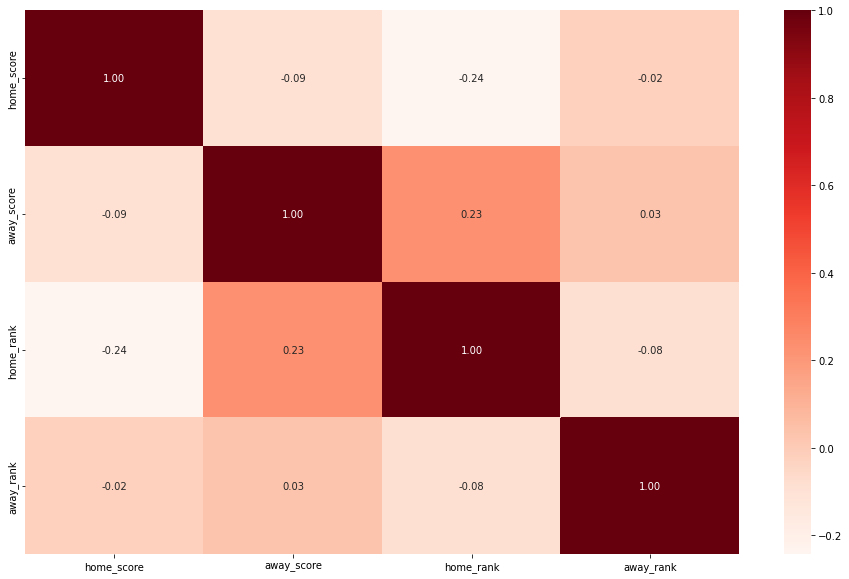

In [51]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

From this correlation heatmap there is no much relation between the variables in question

# **MODELLING**

In [52]:
data.head()

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22.0
1,Bolivia,Uruguay,3,1,FIFA World Cup qualification,53,15.0
2,Bolivia,Uruguay,3,1,FIFA World Cup qualification,53,17.0
3,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,18.0
4,Bolivia,Uruguay,3,1,FIFA World Cup qualification,58,17.0


Creating ranks for the tournament type

In [53]:
def Tournament(Match):
  if Match == Match == 'FIFA World Cup':
    return 1
  elif Match == 'FIFA World Cup qualification':
    return 2
  elif Match == 'Confederations Cup':
    return 3
  elif Match == 'Friendly':
    return 4
  elif Match == 'Copa Paz del Chaco':
    return 5
  elif Match == 'USA Cup':
    return 6
  elif Match == 'Copa América':
    return 7
  elif Match == 'Kirin Cup':
    return 8
  else:
    return 9

# Applying the above function 

data['competition'] = data['tournament'].apply(lambda x: Tournament(x))
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,competition
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22.0,2
1,Bolivia,Uruguay,3,1,FIFA World Cup qualification,53,15.0,2
2,Bolivia,Uruguay,3,1,FIFA World Cup qualification,53,17.0,2
3,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,18.0,2
4,Bolivia,Uruguay,3,1,FIFA World Cup qualification,58,17.0,2


**PLYNOMIAL REGRESSION**

**Model 1: Predict how many goals the home team scores.**

In [54]:
#Importing the necessary libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [55]:
def result(row):
  if row['home_score'] > row['away_score']:
    outcome = 'Win'
  elif row['home_score'] < row['away_score']:
    outcome = 'Lose'
  else:
    outcome = 'Draw'
  return outcome

data['result'] = data.apply(result, axis=1)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,competition,result
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22.0,2,Win
1,Bolivia,Uruguay,3,1,FIFA World Cup qualification,53,15.0,2,Win
2,Bolivia,Uruguay,3,1,FIFA World Cup qualification,53,17.0,2,Win
3,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,18.0,2,Win
4,Bolivia,Uruguay,3,1,FIFA World Cup qualification,58,17.0,2,Win


In [56]:
#Converting the categoricals to numericals:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

data['home_team'] = label_encoder.fit_transform (data['home_team'])
data['away_team'] = label_encoder.fit_transform (data['away_team'])
data['tournament'] = label_encoder.fit_transform (data['tournament'])
data['result'] = label_encoder.fit_transform (data['result'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [57]:
data.head()

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,competition,result
0,0,62,3,1,4,59,22.0,2,2
1,0,62,3,1,4,53,15.0,2,2
2,0,62,3,1,4,53,17.0,2,2
3,0,62,3,1,4,59,18.0,2,2
4,0,62,3,1,4,58,17.0,2,2


**Checking Multicollinearity**

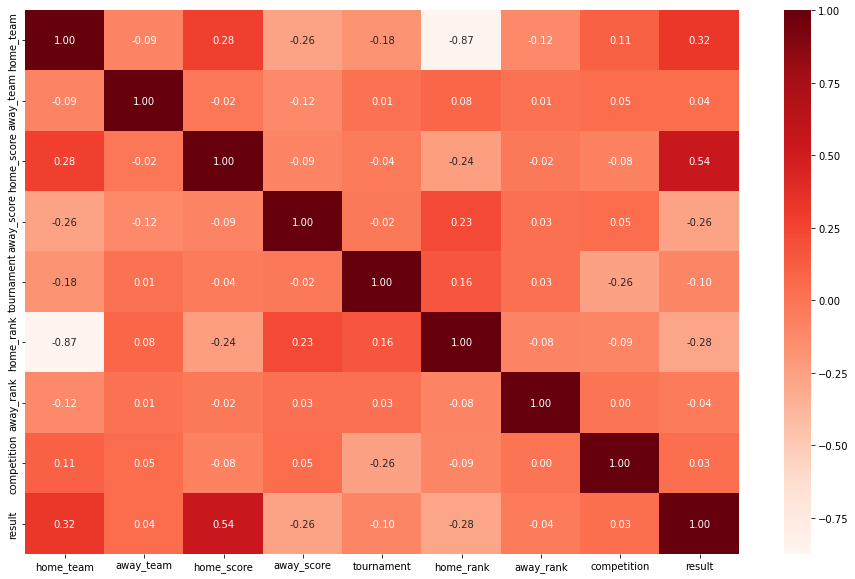

In [58]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

From this correlation heatmap we notice than there is no much correlation between the variables apart from result and home score which has a correlation of 0.54

# Checking multicollearity using the VIF score

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# the independent variables set
Z = data[['away_score', 'tournament', 'home_rank', 'away_rank']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Z.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Z.values, i)
                          for i in range(len(Z.columns))]
  
print(vif_data)

      feature       VIF
0  away_score  1.843071
1  tournament  3.604450
2   home_rank  2.464084
3   away_rank  2.760162


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


From the VIF scores all of them are below 0.5 which makes the workable.

In [60]:
X = data[['home_team', 'away_team','tournament', 'home_rank', 'away_rank']]
y = data['home_score']

In [61]:
#Splitting the dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32671, 5) (8168, 5) (32671,) (8168,)


In [62]:
#Model Selection:
model = PolynomialFeatures(degree = 2)

In [63]:
#Fitting the model:
X_train = model.fit_transform(X_train)
X_test = model.fit_transform(X_test)

In [64]:
#Applying Linear Regression:
Reg = LinearRegression()

In [65]:
#Fitting X and y:
Reg.fit(X_train, y_train)

y_pred = Reg.predict(X_test)

In [66]:
print('Mean squared error (MSE): %.3f' % mean_squared_error(y_test, y_pred ))
print('Coefficient  of Determination (R^2): %.3f' % r2_score(y_test, y_pred ))

Mean squared error (MSE): 2.849
Coefficient  of Determination (R^2): 0.095


By using two degrees we get a r squared of 0.095 whivh is quite low so we try with 3 degrees

In [67]:
#Model Selection:
model = PolynomialFeatures(degree = 3)

#Fitting the model:
X_train = model.fit_transform(X_train)
X_test = model.fit_transform(X_test)

#Applying Linear Regression:
Reg = LinearRegression()

#Fitting X and y:
Reg.fit(X_train, y_train)

y_pred = Reg.predict(X_test)

print('Mean squared error (MSE): %.3f' % mean_squared_error(y_test, y_pred ))
print('Coefficient  of Determination (R^2): %.3f' % r2_score(y_test, y_pred ))

Mean squared error (MSE): 2.258
Coefficient  of Determination (R^2): 0.283


By changing the degrees we get an improved accuracy

**Cross Validation**

In [ ]:
from sklearn.model_selection import KFold

# We will use the same  independent variables for this
X = data[['home_team', 'away_team','tournament', 'home_rank', 'away_rank']]
y = data['home_score']

folds = KFold(n_splits=10)

#Printing the number of folds we will use
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 10 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))

# set up the train and test based on the split determined by KFold
# With 10 folds, we will end up with 80% of our data in the training set, and 20% in the test set
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

**Model 2: Predict how many goals the away team scores.**

# Checking multicollearity using the VIF score

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# the independent variables set
Z = data[['home_score', 'tournament', 'home_rank', 'away_rank']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Z.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Z.values, i)
                          for i in range(len(Z.columns))]
  
print(vif_data)

      feature       VIF
0  home_score  1.907384
1  tournament  4.075880
2   home_rank  2.242957
3   away_rank  2.799607


By using the VIF score we notice none is below 5 so we can work with them as they show low degrees of multicollinearity

In [72]:
X1 = data[['home_team', 'away_team', 'tournament', 'home_rank', 'away_rank']]
y1 = data['away_score']

In [73]:
# Split the dataset into train and test sets
X1_train, y1_train, X1_test, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state=0)

In [ ]:
#Model Selection:
model = PolynomialFeatures(degree = 2)

#Fitting the model:
X_train = model.fit_transform(X_train)
X_test = model.fit_transform(X_test)

#Applying Linear Regression:
Reg = LinearRegression()

#Fitting X and y:
Reg.fit(X_train, y_train)

y_pred = Reg.predict(X_test)

print('Mean squared error (MSE): %.3f' % mean_squared_error(y_test, y_pred ))
print('Coefficient  of Determination (R^2): %.3f' % r2_score(y_test, y_pred ))

In [191]:
# Split the dataset into train and test sets
X1_train, y1_train, X1_test, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state=0)

In [ ]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X1)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y1)

y_pred = pol_reg.predict(poly_reg.fit_transform(X1_test))

In [ ]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X1_poly = poly_reg.fit_transform(X1)

pol_reg = LinearRegression()
pol_reg.fit(X1_poly, y1)

b_pred = pol_reg.predict(poly_reg.fit_transform(X1_test))

**LOGISTIC REGRESSION**

In [74]:
data.head()

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,competition,result
0,0,62,3,1,4,59,22.0,2,2
1,0,62,3,1,4,53,15.0,2,2
2,0,62,3,1,4,53,17.0,2,2
3,0,62,3,1,4,59,18.0,2,2
4,0,62,3,1,4,58,17.0,2,2


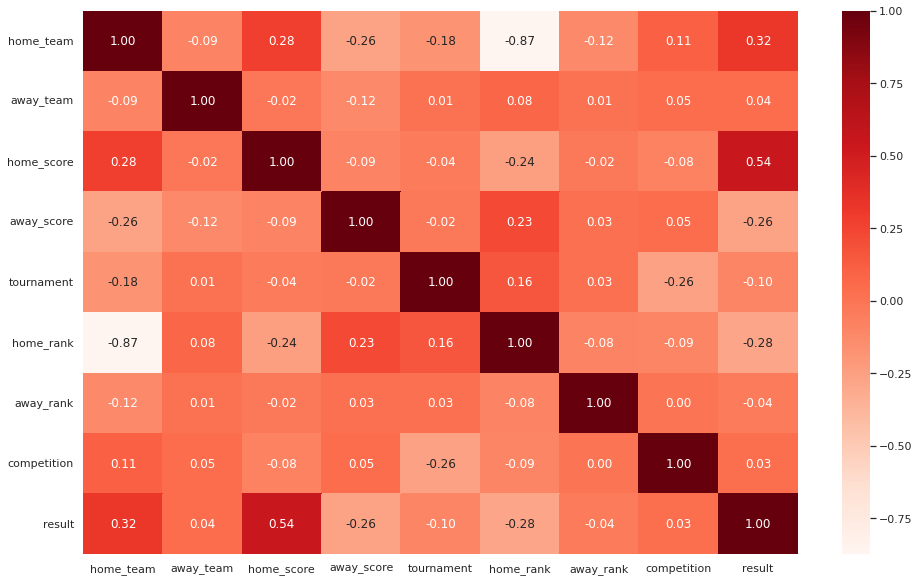

In [122]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

In [75]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


# the independent variables set
Z = data[['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'home_rank', 'away_rank']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Z.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Z.values, i)
                          for i in range(len(Z.columns))]
  
print(vif_data)

      feature       VIF
0   home_team  3.121702
1   away_team  3.161854
2  home_score  2.364040
3  away_score  1.886157
4  tournament  5.326332
5   home_rank  4.792897
6   away_rank  3.102014


In [76]:
# Splitting our dataset
#
X = data.drop(['competition'] ,axis=1)
y = data['result']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [77]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [78]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [79]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[3125,    0,    0],
       [   0, 2302,    0],
       [   0,    0, 6825]])

From the confusion matrix we note that our model correctly predicted all the match results

In [80]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 1.0


The model accuracy is 100%

**Hyperparameter Tuning**

In [81]:
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [82]:
#Defining the model:
model = LogisticRegression()

#Defining the search space:
param_grid = [{'penalty': ['l1', 'l2'], 'C': np.logspace(0, 4, 10)}]

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(model, param_grid = param_grid, cv=5, verbose=0)

# Fitting/Executing grid search
best_clf = clf.fit(X, y)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [83]:
#Summary result:
print("Best score: ",best_clf.score(X,y)*100)
print('Best Penalty:', best_clf.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf.best_estimator_.get_params()['C'])

Best score:  100.0
Best Penalty: l2
Best C: 1.0


**Conclusion**

Generally logistic regression was the better when creating a model compared to polynomial regression. It also had the possibility of being improved by adding more hyperparameters

# Follow up questions

**a). Did we have the right data?**

Yes,  we had the right data to be able to manipulate it to our needing

**b). Do we need other data to answer our question?**

Since FIFA ranking records that we had we from 1993 and games recorded first was 1872, it would be better if the ranking of the games would have been available by then

**c). Did we have the right question?**

Yes we do have the right question though it can be tilted to get more.